# Categorical Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
heart = pd.read_csv('selected_heartdata.csv')
heart.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,0,3,0,0,5,3.0
1,0,3,1,0,0,0.0
2,0,2,0,0,1,0.0
3,0,1,0,0,0,0.0
4,0,2,0,1,3,0.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report


In [4]:
X = heart.drop(columns=['HeartDisease'])  
Y = heart['HeartDisease'] 

X is a dataframe that contains all variables except HeartDisease

In [5]:
X_train, X_test,Y_train, Y_test, = train_test_split(X, Y,test_size = 0.20)

In [6]:
clf = CategoricalNB()
clf.fit(X_train, Y_train)

CategoricalNB()

In [7]:
Y_pred = clf.predict(X_test)

In [8]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Categorical Naive Bayes Accuracy:", accuracy)

Categorical Naive Bayes Accuracy: 0.9217868663811806


True Postive Rate for Train Data:  0.16046176046176047
False Postive Rate for Train Data:  0.02496770547392217
False Negative Rate for Train Data:  0.8395382395382396
True Negative Rate for Train Data:  0.9750322945260779

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     49544
           1       0.31      0.16      0.21      3465

    accuracy                           0.92     53009
   macro avg       0.63      0.57      0.59     53009
weighted avg       0.90      0.92      0.91     53009



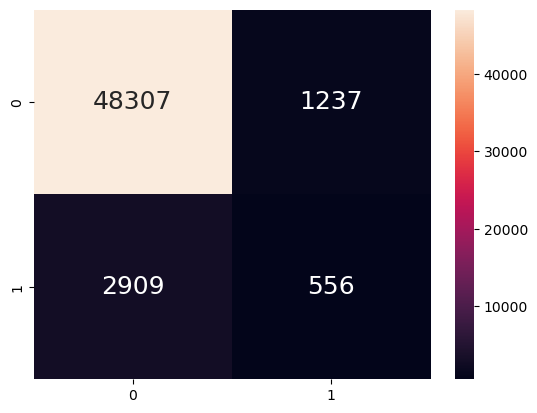

In [9]:
array1 = confusion_matrix(Y_test, Y_pred)
TP = array1[1, 1]  # True Positive
FP = array1[0, 1]  # False Positive
TN = array1[0, 0]  # True Negative
FN = array1[1, 0]  # False Negative

sb.heatmap(confusion_matrix(Y_test, Y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


True_Positive_Rate = TP / (TP + FN)
False_Positive_Rate = FP / (FP + TN)
False_Negative_Rate = FN / (FN + TP)
True_Negative_Rate= TN/ (TN+FP)

print("True Postive Rate for Train Data: ",True_Positive_Rate )
print("False Postive Rate for Train Data: ",False_Positive_Rate)
print("False Negative Rate for Train Data: ",False_Negative_Rate)
print("True Negative Rate for Train Data: ",True_Negative_Rate)
print()
print(classification_report(Y_test, Y_pred))


##### Classical Naive Bayes Model has a high classification accuracy but the false negative rate is unsually high and the true positive rate is extremely low due to the unbalanced data set with a large number of data that contains heartdisease=no.

## Classification process with balanced data

In [10]:
heart = pd.read_csv('balanced_heartdata.csv')
heart.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,1,2,0,1,0,0.0
1,1,0,0,0,2,3.0
2,1,2,0,0,5,0.0
3,1,1,0,1,2,2.0
4,1,3,0,0,4,2.0


In [11]:
X = heart.drop(columns=['HeartDisease'])  
Y = heart['HeartDisease'] 

In [12]:
X.head()

,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,2,0,1,0,0.0
1,0,0,0,2,3.0
2,2,0,0,5,0.0
3,1,0,1,2,2.0
4,3,0,0,4,2.0


In [13]:
X_train, X_test,Y_train, Y_test, = train_test_split(X, Y,test_size = 0.20)

In [14]:
clf = CategoricalNB()
clf.fit(X_train, Y_train)

CategoricalNB()

In [15]:
Y_pred = clf.predict(X_test)

In [16]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Categorical Naive Bayes Accuracy for balanced data:", accuracy)

Categorical Naive Bayes Accuracy for balanced data: 0.742087254063302


True Postive Rate for Train Data:  0.7616312464101092
False Postive Rate for Train Data:  0.27718006795016986
False Negative Rate for Train Data:  0.23836875358989087
True Negative Rate for Train Data:  0.7228199320498301

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      3532
           1       0.73      0.76      0.75      3482

    accuracy                           0.74      7014
   macro avg       0.74      0.74      0.74      7014
weighted avg       0.74      0.74      0.74      7014



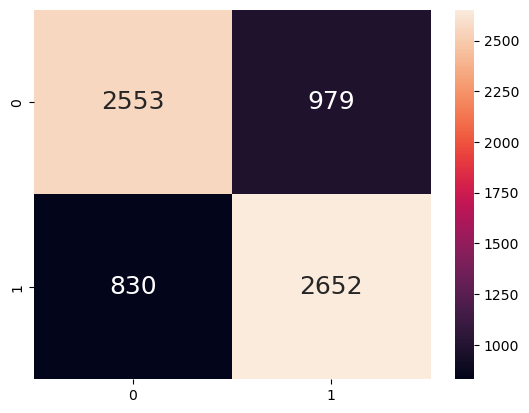

In [17]:
array1 = confusion_matrix(Y_test, Y_pred)
TP = array1[1, 1]  # True Positive
FP = array1[0, 1]  # False Positive
TN = array1[0, 0]  # True Negative
FN = array1[1, 0]  # False Negative

sb.heatmap(confusion_matrix(Y_test, Y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


True_Positive_Rate = TP / (TP + FN)
False_Positive_Rate = FP / (FP + TN)
False_Negative_Rate = FN / (FN + TP)
True_Negative_Rate= TN/ (TN+FP)

print("True Postive Rate for Train Data: ",True_Positive_Rate )
print("False Postive Rate for Train Data: ",False_Positive_Rate)
print("False Negative Rate for Train Data: ",False_Negative_Rate)
print("True Negative Rate for Train Data: ",True_Negative_Rate)
print()
print(classification_report(Y_test, Y_pred))